# Python Codes

## Laden der nötigen Bibliotheken

In [1]:
### Import -Block###
from pandas import DataFrame, Series
from numpy import abs, arange, sin, cos, pi, linspace, meshgrid, float, zeros, ones, pad, array
from numpy.random import uniform
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go
import plotly.express as px 
from seaborn import heatmap
from scipy.special import gamma
from sympy import symbols, diff, integrate 

#from myst_nb import glue        # Da glue mit den plot-outputs nicht funktioniert, wurde html export und raw html display verwendet.

## Visualisierung der Einheitssphären

### Koordinatenfindung

In [283]:
def unitvectors(prange, dimensions, smoothness = 8):
  '''
    Hilfsfunktion zur Erzeugung von Punkten auf der Einheitssphäre 

            Parameter:
                    prange (array): 1d numpy Array mit den Werten für p
                    dimensions (int): Bestimmung der Dimensionen
                    smoothness (int): Exponentialfaktor zur Bestimmung der Anzahl an Punkten
                    
            Return:
                    df (DataFrame): pandas Dataframe, dessen Spalten die x- und y-Koordinaten der Punkte sind im 2D-Fall
                    X,Y,Z (lists): Listen von (step_size * step_size) arrays im 3D-Fall
    '''
  assert dimensions in [2,3]  # Dimension muss 2 oder 3 sein.
  assert len(prange) >= 1     # es muss mindestens ein p-Wert gegeben sein
  assert min(prange) >= 1     # p sollte nicht kleiner als 1 sein
  
  # Ungerade Anzahl verbessert die Darstellung der Kanten
  num_steps = 2**smoothness + 1
  df = DataFrame()

  if dimensions == 2:
    for p in prange:
      # Berechnung in Polar-Koordinaten
      theta = linspace(0, pi * 2, num_steps)
      r = (abs(sin(theta))**p + abs(cos(theta))**p)**(-1/p)

      # Konvertierung in Karthesische Koordinaten
      x = r * cos(theta)
      y = r * sin(theta)

      # Umwanden in einer Series und anheften ans DataFrame
      df['x{}'.format(p)] = Series(x)
      df['y{}'.format(p)] = Series(y)

    return df
  elif dimensions ==3:
    X, Y, Z = [], [], []
    for p in prange:
      # Berechnung Sphärischer-Koordinaten
      theta = linspace(0, pi*2, num_steps)
      phi   = linspace(0, pi, num_steps)

      theta, phi = meshgrid(theta, phi)

      rho = lambda x : (abs(sin(x))**p + abs(cos(x))**p)**(-1/p)

      # Umwandlung in karthesische
      x = sin(phi)*rho(phi)*cos(theta)*rho(theta)
      y = sin(phi)*rho(phi)*sin(theta)*rho(theta)
      z = cos(phi)*rho(phi)
      X.append(x)
      Y.append(y)
      Z.append(z)
    return X,Y,Z


In [284]:
# Definition der p-Werte
prange = arange(1, 6.1, 0.1)

# Bestimmung der Koordinaten
df = unitvectors(prange, 2)
X, Y, Z = unitvectors(prange, 3, 6)


C:\Users\1CA4~1\AppData\Local\Temp/ipykernel_22688/3775903163.py:33: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\1CA4~1\AppData\Local\Temp/ipykernel_22688/3775903163.py:34: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



### 2D-Plot

In [286]:
### INTERAKTIVER PLOT 2D ###
fig = go.Figure()

# Iteratives hinzufügen der Einheitskreise
for step in prange:
    fig.add_trace(
        go.Scatter(
            visible=False, #Unsichtbar, da sonst alle Schritte gleichzeitig sichtbar
            line=dict(color="#0324fc", width=2),
            name="p = " + str(step),
            x=df['x{}'.format(step)],
            y=df['y{}'.format(step)]))

# "Startpunkt" sichtbar
fig.data[0].visible = True

# Generierung des Sliders
steps = []
for i in prange:
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Einheitskreis für p = " + str(i)}],  
    )
    step["args"][0]["visible"][list(prange).index(i)] = True  # Schaltung des aktiven Wertes auf sichtbar
    steps.append(step)

sliders = [dict(steps=steps)]

    
  # Formatierung/Layout
fig.update_layout(
    sliders=sliders,
    showlegend=False,
    width=600,
    height=600,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1
    ),
    plot_bgcolor = '#fff',
  )
fig.update_xaxes(showgrid=True, zerolinecolor='Grey', showticklabels=True)
fig.update_yaxes(showgrid=True, zerolinecolor='Grey', showticklabels=True)

fig.write_html("./2d.html")


### 3D-Plot

In [5]:
fig3 = go.Figure()
# Iteratives hinzufügen der Einheitssphären
for step in range(len(prange)):
    fig3.add_trace(
        go.Surface(
            visible=False, #Unsichtbar, da sonst alle Schritte gleichzeitig sichtbar
            colorscale='RdBu',
            name="p = " + str(step),
            x=X[list(prange).index(prange[step])],
            y=Y[list(prange).index(prange[step])],
            z=Z[list(prange).index(prange[step])],
            showscale=False ))

# "Startpunkt" sichtbar
fig3.data[1].visible = True

# Generierung des Sliders
steps = []
for i in prange:
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig3.data)},
              {"title": "Einheitssphäre für p = " + str(i)}],  
    )
    step["args"][0]["visible"][list(prange).index(i)] = True  # Schaltung des aktiven Wertes auf sichtbar
    steps.append(step)

sliders = [dict(steps=steps)]


 # Formatierung/Layout
fig3.update_layout(
    sliders=sliders,
    showlegend=False,
    width=600,
    height=600,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1
    ),
    plot_bgcolor = '#fff',
  )
fig3.update_xaxes(showgrid=True, zerolinecolor='Grey', showticklabels=True)
fig3.update_yaxes(showgrid=True, zerolinecolor='Grey', showticklabels=True)



fig3.write_html("./3d.html")


## Plot der Abstandsänderung

### Implementierung der Metriken und einer Funktion zur Abstandsbestimmung

In [2]:
def minkowski(x,y, p):
    '''
    Implementierung der Minkowski-Distanz zweier Punkte

            Parameter:
                    x (list, tuple, array oder Series): Koordinaten des ersten Punktes
                    y (list, tuple, array oder Series): Koordinaten des zweiten Punktes. 
                    p (float oder str): Exponent der p-Norm. 
            
            Return: 
                    md (float): Minkowski-Distanz der beiden Punkte
    
    '''
    assert len(x) == len(y) #Vektoren müssen gleicher Länge sein
    md = 0
    if type(p) in [float, int]:
        #assert p >= 1       #p muss >1 sein
        
        for i in range(len(x)):
            md = md + abs(x[i] - y[i])**p 
        md = md**(1/p)
        
    elif type(p) == str:
        assert p in ['infinity', 'infty', '\infty', 'unendlich']   
        z = [abs(x[i]-y[i]) for i in range(len(x))] 
        md = max(z)
    return md
    
def iterFlatten(root):
    if isinstance(root, (list, tuple)):
        for element in root:
            for e in iterFlatten(element):
                yield e
    else:
        yield root

def distances(prange, points):
    '''
    Hilfsfunktion zur erzeugung der Minkowski-Normen (= Miknowski-Distanz zu 0)

            Parameter:
                    prange (array): 1d numpy Array mit den Werten für p
                    points (list): Liste von Punkten
                    
                    
            Return:
                    df (DataFrame): pandas Dataframe mit drei Spalten (p, punkt, Abstand des Punktes zu 0 bez. p-Norm)
                    
    '''  
    
    for i in range(1,len(points)):
        assert len(points[i]) == len(points[0])    # Alle Punkte müssen die selben Dimensionen haben. 
    
    df = DataFrame()
    pts = []
    norms = []
    pvs = []
    for p in prange:    
        pvs.append([p]*len(points))
        pv = list(iterFlatten(pvs))
        for point in points:
            norms.append(minkowski(point, [0] * len(point), p))
            pts.append(str(point))   
        
    df['p'] = Series(pv)
    df['Punkte'] = Series(pts)
    df['Abstand zu 0'] = Series(norms)
    return df

### Plotten der Abstände

In [21]:
punkte = [[0.2, 0.3],[1,0], [1,0.5], [1,1], [2,3], [5,0], [5,1] ,[5,5]]
ps = [1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10, 'infinity']

df = distances(ps, punkte)

figb = px.bar(df, x='Punkte', y='Abstand zu 0',  animation_frame='p', title='Abstände zum Nullpunkt bei Variation von p', range_y=[0, 11])
figb.show()


figb.write_html("./b.html")

In [22]:
punkte2 = [[[5,1.5],[-2.5,7]], [[-1,-1],[5,5]], [[1,5],[9,5]], [[-1,0],[-1,-6.3]], [[3.4,-3.2], [5.1, 2]] ]

df2 = DataFrame()
pts = []
norms = []
pvs = []
for i in range(len(punkte2)):
    for p in ps:    
        pvs.append(p)
        pv = list(iterFlatten(pvs))
    
        norms.append(minkowski(punkte2[i][0], punkte2[i][1], p))
        pts.append(str(punkte2[i]))   
    
df2['p'] = Series(pv)
df2['Punkte'] = Series(pts)
df2['Abstand voneinander'] = Series(norms)


#print(df2)

figb2 = px.bar(data_frame = df2, x='Punkte', y='Abstand voneinander',  animation_frame='p', title='Abstände voneinander', range_y=[0, 15])
figb2.update_traces(width=0.05)
figb2.show()



figb2.write_html("./b2.html")

### Abstandsgitter

In [228]:

def bordered(size=7):
    
    if (size % 2) == 0:    # Prüfung ob Zahl gerade und 1 dazugezählt werden muss. 
        size = size        # es wird nicht 1 dazugezählt, da der Rand eigens erzeugt wird
    else:
        size = size -1     # es wird eins entfernt, damit die Dimension mit Rand stimmt.

    # Erzeugen der inneren Matrix
    borderless = zeros((size-1, size-1))
    # Modifikation des mittleren Elements
    n_int = int(len(borderless)/2)
    borderless[[n_int], [n_int]] = 0
    # Hinzufügen des Randes
    bordered1 = pad(borderless, pad_width=1, mode = "constant", constant_values =1)
    bordered2 = pad(bordered1, pad_width=1, mode = "constant", constant_values =2)
    bordered3 = pad(bordered2, pad_width=1, mode = "constant", constant_values =3)
    return bordered3


In [ ]:
chebyshev = bordered(2)

In [ ]:
figh, ax = plt.subplots(figsize=(10,10)) 
heatmap(chebyshev, annot= True, cmap= 'Blues', cbar=False, xticklabels=False, yticklabels = False, ax=ax).set_title('Chebyshev-Distanz auf Koordinatengitter')

figh.savefig("cgrid.svg")


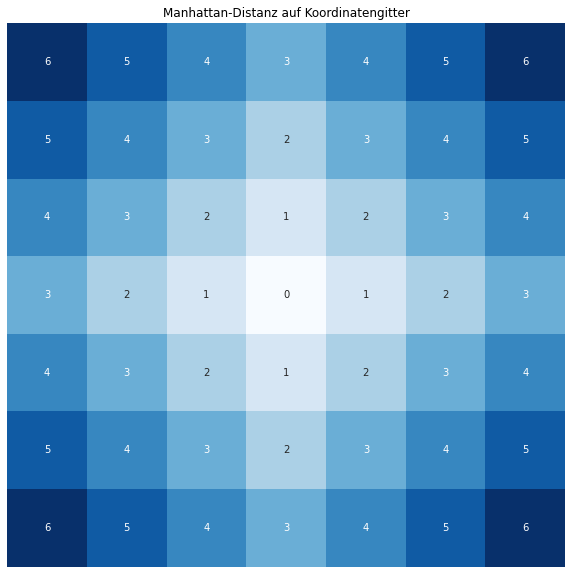

In [44]:
manhattan = array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])
       
figh, ax = plt.subplots(figsize=(10,10)) 
heatmap(manhattan, annot= True, cmap= 'Blues', cbar=False, xticklabels=False, yticklabels = False, ax=ax).set_title('Manhattan-Distanz auf Koordinatengitter')

figh.savefig("mgrid.svg")


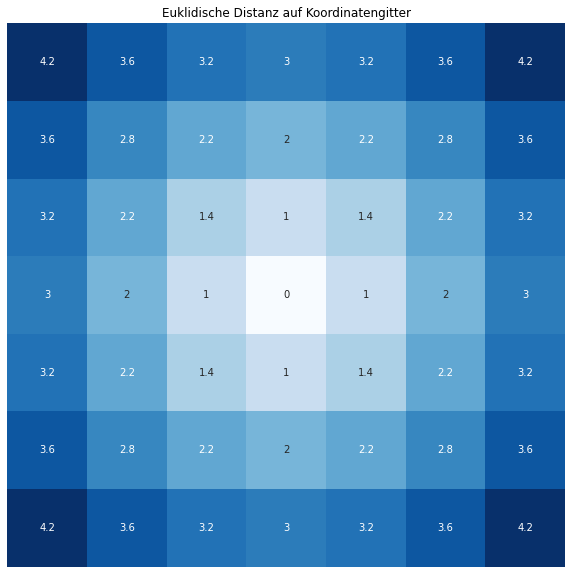

In [45]:
euclidean = array([[4.24, 3.61, 3.16, 3, 3.16, 3.61, 4.24],
       [3.61, 2.83, 2.24, 2, 2.24, 2.83, 3.61],
       [3.16, 2.24, 1.41, 1, 1.41, 2.24, 3.16],
       [3, 2, 1, 0, 1, 2, 3],
       [3.16, 2.24, 1.41, 1, 1.41, 2.24, 3.16],
       [3.61, 2.83, 2.24, 2, 2.24, 2.83, 3.61],
       [4.24, 3.61, 3.16, 3, 3.16, 3.61, 4.24]])

figh, ax = plt.subplots(figsize=(10,10)) 
heatmap(euclidean, annot= True, cmap= 'Blues', cbar=False, xticklabels=False, yticklabels = False, ax=ax).set_title('Euklidische Distanz auf Koordinatengitter')

figh.savefig("egrid.svg")

## Dimemnsions-Plots

### Abstände

In [3]:
dimensions = list(range(1,13))

df3 = DataFrame()
ds = []
dists = []

for d in dimensions:
    scaler = minkowski(ones(d), zeros(d), 2)
    for i in range(5000):
        ds.append(d)
        dists.append(minkowski(uniform(low=-1, high=1, size=d), zeros(d), 2)/scaler)
        

df3['d'] = Series(ds)
df3['dists'] = Series(dists)



In [4]:
fighist = px.histogram(data_frame = df3, animation_frame='d', title='Abstände 5000 gleichverteilt gesampelter Punkte zum Nullpunkt', range_x=[0, 1], range_y=[0,300], nbins=100)
#fighist.update_traces(width=0.05)


fighist.update_layout(showlegend=False)
fighist.show()
fighist.write_html("./fighist1.html")

### Einheitssphäre/Hyperwürfel

In [6]:
def ratio_volume_hypercube_hypersphere(d):
    return (pi**(d/2))/(gamma((d/2+1)))/(2**d)

In [7]:
volume_ratios = []
for i in range(1,12):
    volume_ratios.append(ratio_volume_hypercube_hypersphere(i))

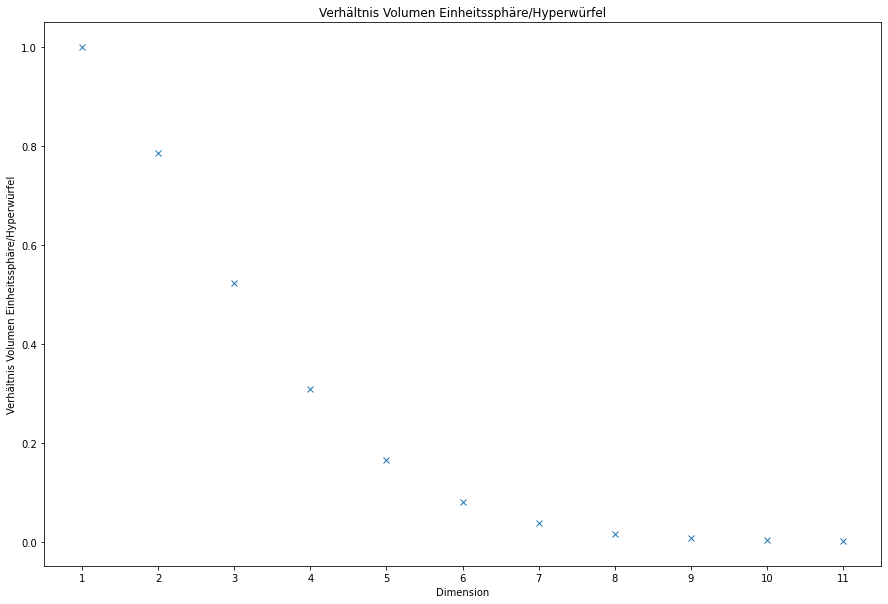

In [11]:
figure(figsize=(15, 10))

plt.plot(volume_ratios, 'x')
plt.xlabel('Dimension')
plt.xticks(ticks = list(range(11)) ,labels = list(range(1,12)))
plt.ylabel('Verhältnis Volumen Einheitssphäre/Hyperwürfel')
plt.title('Verhältnis Volumen Einheitssphäre/Hyperwürfel')

plt.savefig('ratio.svg')

In [23]:
def distance_table(ps, ds):
    distancetable = DataFrame()
    distancetable['d'] = Series(ds)
    for p in ps:
        dists = []
        for d in ds:
            point = ones(d)
            dists.append(minkowski(point, zeros(d), p))
        distancetable['p={}'.format(p)] = Series(dists).astype('object')   
    return distancetable
ds = [1, 2, 3, 5, 10]
ps = [1, 1/2, 1/4, 1/10, 1/100]


In [31]:
print(distance_table(ps,ds).to_latex())

\begin{tabular}{lrlllll}
\toprule
{} &   d &   p=1 &  p=0.5 &   p=0.25 &          p=0.1 &                                             p=0.01 \\
\midrule
0 &   1 &   1.0 &    1.0 &      1.0 &            1.0 &                                                1.0 \\
1 &   2 &   2.0 &    4.0 &     16.0 &         1024.0 &                  1267650600228229401496703205376.0 \\
2 &   3 &   3.0 &    9.0 &     81.0 &        59049.0 &  5153775207320113241945962688686184408524594872... \\
3 &   5 &   5.0 &   25.0 &    625.0 &      9765625.0 &  7888609052210118179568976417591761882603167107... \\
4 &  10 &  10.0 &  100.0 &  10000.0 &  10000000000.0 &  1000000000000000015902891109759918046836080856... \\
\bottomrule
\end{tabular}



In [13]:
usvols = []
hcvols = []
for d in range(1,20):    
    usvols.append((pi**(d/2))/(gamma((d/2+1))))
    hcvols.append(2**d)


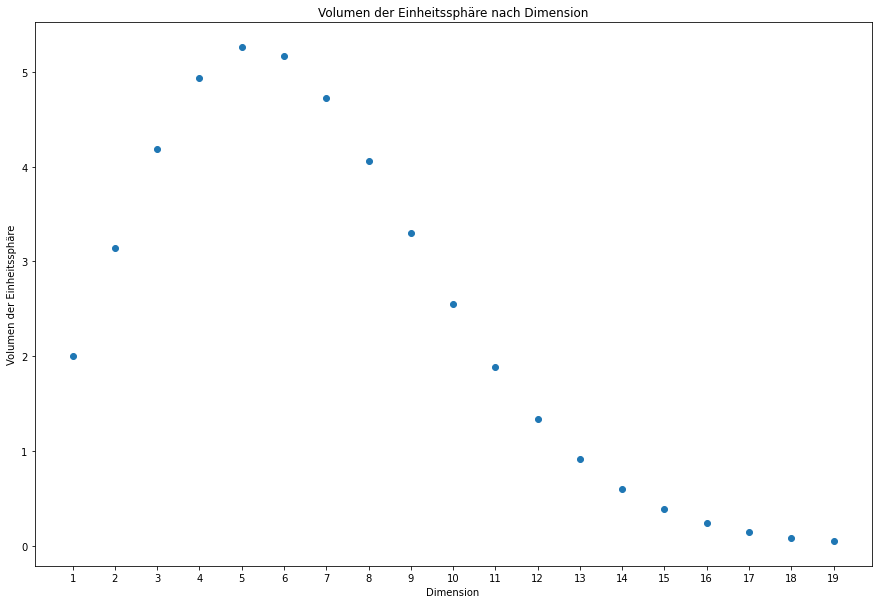

In [21]:
ax = plt.figure(figsize=(15,10)).gca()
ax.plot(usvols, 'o')

ax.set_xlabel('Dimension')
ax.set_ylabel('Volumen der Einheitssphäre')
ax.set_title('Volumen der Einheitssphäre nach Dimension')
ax.set_xticks(list(range(0,19)))
ax.set_xticklabels(list(range(1,20)))
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_xticklabels(list(range(0,20)))

plt.savefig('USvols.svg')

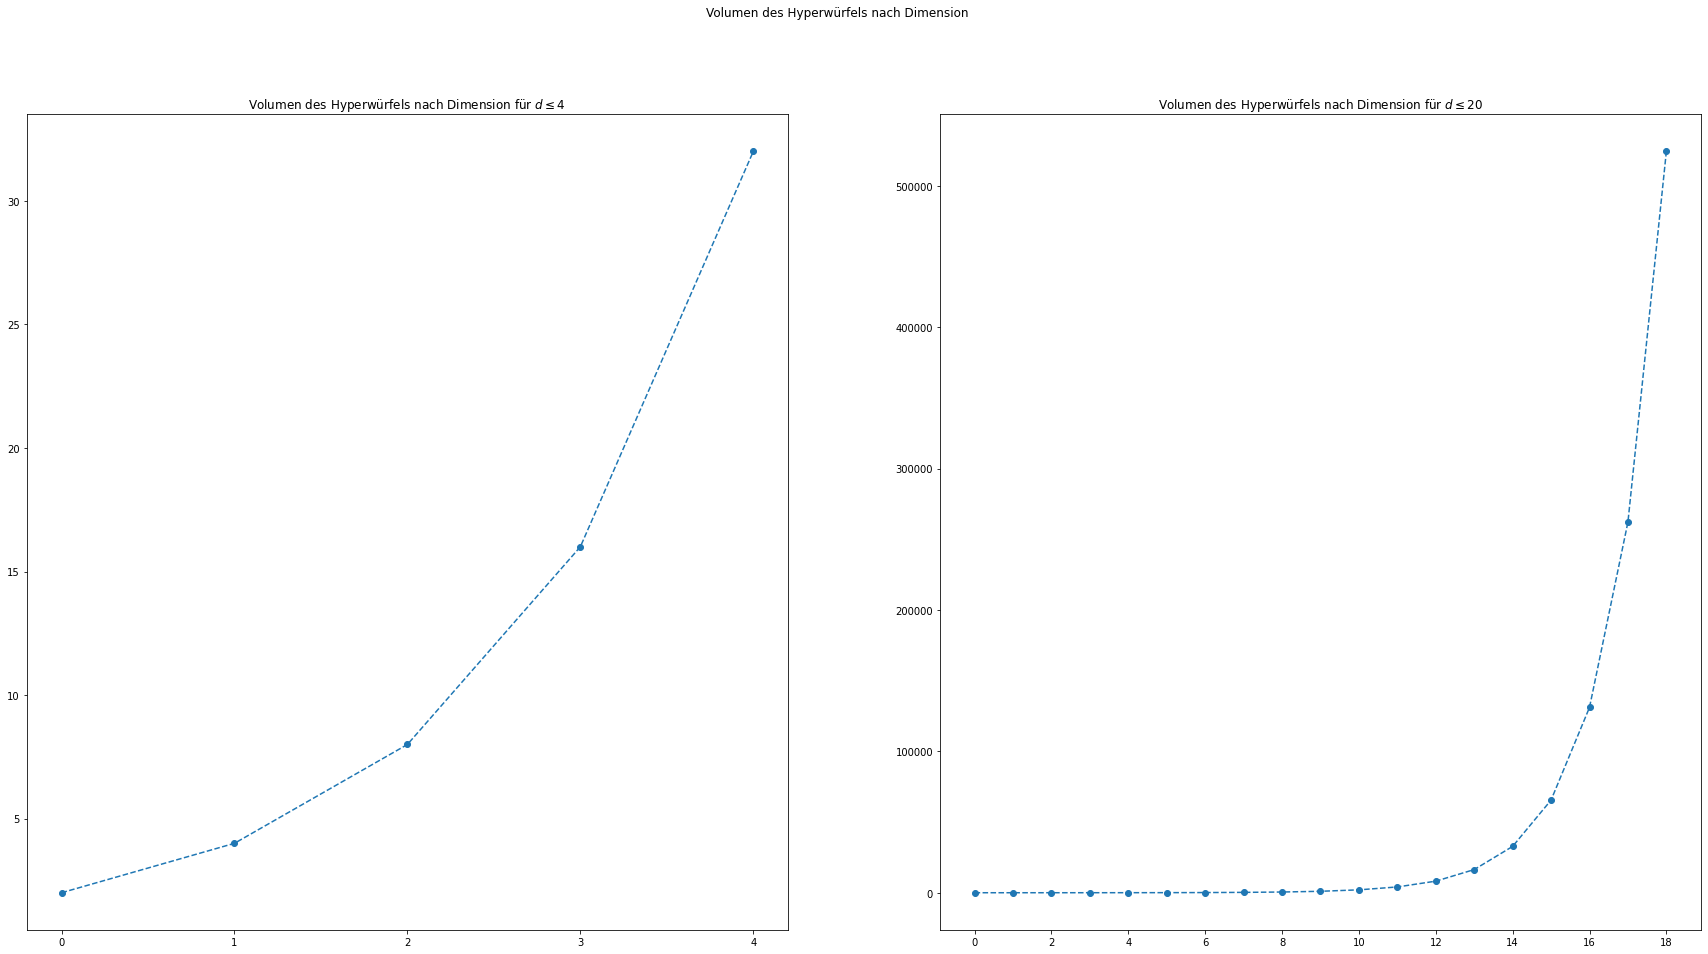

In [222]:
fig, axs = plt.subplots(1, 2, figsize=(30, 15), sharey=False)
fig.suptitle('Volumen des Hyperwürfels nach Dimension')
axs[0].plot(hcvols[0:5], 'o--')
#plt.xlabel('Dimension')
#plt.ylabel('Volumen des Hyperwürfels')
axs[0].set_title('Volumen des Hyperwürfels nach Dimension für $d \leq 4$')
axs[1].plot(hcvols, 'o--')
axs[1].set_title('Volumen des Hyperwürfels nach Dimension für $d \leq 20$')
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('HCvols.svg')

In [28]:
#fig = go.Figure()
#fig.add_trace(
#    go.Scatter(y=hcvols))
    


#layout = dict(
#    title = "Volumen des Hyperwürfels nach Dimension",
#    xaxis=dict(
#        rangeselector=dict(
#                    ),
#        rangeslider=dict(
#            visible=True)),
#    yaxis=dict(
#        fixedrange= False,
#        autorange = True   )
#)
#def zoom(layout, xrange):
  #  in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
  #  fig.layout.yaxis.range = [in_view.High.min() - 10, in_view.High.max() + 10]



#fig.write_html("./experi.html")


### $\pi$

In [160]:
x= symbols('x')
pis = []
for n in arange(1,5.125,0.125):
    f = (1+(abs(diff((1-x**n)**(1/n), x))**n))**(1/n)
    integral = integrate(f, (x,0,1))
    pis.append(2*integral.evalf())

In [212]:
dfpis = DataFrame()
dfpis['x'] = (list(arange(1,5.125,0.125)))
dfpis['y'] = Series(pis).astype('float')


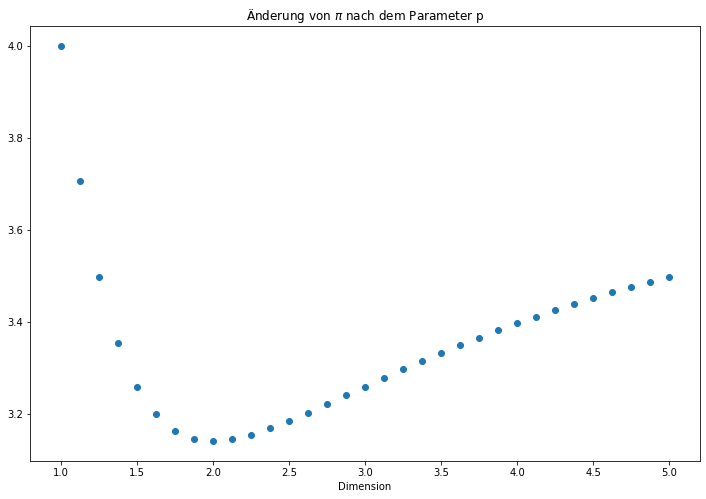

In [220]:
dfpis.plot(x='x', y='y', style='o', figsize = (12,8), title = 'Änderung von $\pi $ nach dem Parameter p', legend = False, xlabel = 'Dimension' ).get_figure().savefig('./pis.svg')